# So my notes got messed up and I got to work soon
I messed up the pushed to the repo and deleted the file with my notes/comments so long story short

I ran Random Forest, XGBoost, and SVC.

While reviewing I found some issues with my categorical encoding so I'll fix and let it run while on drill
and also run SVC again cause I stopped after 4 hours

In [1]:
import pandas as pd
import numpy as np 
import glob
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import ensemble
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.cluster import KMeans
from category_encoders import BinaryEncoder
import tensorflow as tf
from tensorflow import keras
from keras import metrics
import xgboost as xgb
from sklearn.metrics import mean_squared_error as MSE 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import accuracy_score, classification_report




2024-12-06 20:08:44.610986: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-06 20:08:44.682437: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-06 20:08:44.705326: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-06 20:08:44.711950: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-06 20:08:44.757461: I tensorflow/core/platform/cpu_feature_guar

In [2]:
os.system('clear') 


0

In [3]:
# Predata is used to make changes on the fly
predata = pd.read_csv("/home/eduardogh99/datasci207/talkin-ball-with-Santerre/training_data.csv")

/tmp/ipykernel_17234/3810129578.py:2: DtypeWarning: Columns (27,92,93) have mixed types. Specify dtype option on import or set low_memory=False.
  predata = pd.read_csv("/home/eduardogh99/datasci207/talkin-ball-with-Santerre/training_data.csv")


In [4]:
# Quick Check
rows = predata.shape[0]
cols = predata.shape[1]
print(f"Rows: {rows}")
print(f"Columns: {cols}")

Rows: 1068473
Columns: 167


In [5]:
# Quick Check
predata.head(5)

,PitchNo,Date,Time,PAofInning,PitchofPA,Pitcher,PitcherId,PitcherThrows,PitcherTeam,Batter,...,ThrowTrajectoryZc1,ThrowTrajectoryZc2,PitchReleaseConfidence,PitchLocationConfidence,PitchMovementConfidence,HitLaunchConfidence,HitLandingConfidence,CatcherThrowCatchConfidence,CatcherThrowReleaseConfidence,CatcherThrowLocationConfidence
0,1,2024-03-02,13:32:53.75,1.0,1.0,"Quinn, JT",1.000234e+09,Right,OLE_REB,"Wilmes, Ben",...,NaN,NaN,High,High,High,NaN,NaN,NaN,NaN,NaN
1,2,2024-03-02,13:33:10.55,1.0,2.0,"Quinn, JT",1.000234e+09,Right,OLE_REB,"Wilmes, Ben",...,NaN,NaN,High,High,High,NaN,NaN,NaN,NaN,NaN
2,3,2024-03-02,13:33:23.01,1.0,3.0,"Quinn, JT",1.000234e+09,Right,OLE_REB,"Wilmes, Ben",...,NaN,NaN,High,High,High,Medium,Low,NaN,NaN,NaN
3,4,2024-03-02,13:33:44.31,1.0,4.0,"Quinn, JT",1.000234e+09,Right,OLE_REB,"Wilmes, Ben",...,NaN,NaN,High,High,High,High,Low,NaN,NaN,NaN
4,5,2024-03-02,13:34:08.96,1.0,5.0,"Quinn, JT",1.000234e+09,Right,OLE_REB,"Wilmes, Ben",...,NaN,NaN,High,High,High,NaN,NaN,NaN,NaN,NaN


In [6]:
# Copying Needed For Analysis
required_columns = ['TaggedPitchType', 'AutoPitchType', 'RelSpeed', 'RelHeight', 'VertRelAngle', 'HorzRelAngle',
                      'SpinRate', 'SpinAxis', 'Tilt', 'Extension','InducedVertBreak', 'HorzBreak', 'VertApprAngle', 'HorzApprAngle', 'PlayResult', 'PitchCall']
data = predata.dropna(subset=required_columns)
data = data[['TaggedPitchType', 'AutoPitchType', 'RelSpeed', 'RelHeight', 'VertRelAngle', 'HorzRelAngle',
             'SpinRate', 'SpinAxis', 'Tilt', 'Extension','InducedVertBreak', 'HorzBreak', 'VertApprAngle', 'HorzApprAngle', 'PlayResult', 'PitchCall']]

rows = data.shape[0]
cols = data.shape[1]
print(f"Rows: {rows}")
print(f"Columns: {cols}")

Rows: 1052670
Columns: 16


In [7]:
data['PlayResult'].value_counts()

Undefined         871662
Out               101674
Single             41992
Double             12472
HomeRun             7686
Error               4908
FieldersChoice      4523
Sacrifice           4298
StolenBase          1626
Triple              1306
CaughtStealing       522
error                  1
Name: PlayResult, dtype: int64

In [8]:
data['PitchCall'].value_counts()

BallCalled              393718
StrikeCalled            187478
InPlay                  178872
FoulBallNotFieldable    109924
StrikeSwinging          106589
FoulBall                 47783
BallinDirt               10878
HitByPitch                9125
Undefined                 5244
FoulBallFieldable         2967
BallIntentional             91
StrkeSwinging                1
Name: PitchCall, dtype: int64

In [9]:
data['TargetVariable'] = data['PlayResult'] + data['PitchCall']

In [10]:
data = data.drop(['PlayResult'], axis=1)
data = data.drop(['PitchCall'], axis=1)
data['TargetVariable'].value_counts()

UndefinedBallCalled                   392373
UndefinedStrikeCalled                 187074
UndefinedFoulBallNotFieldable         109913
UndefinedStrikeSwinging               106276
OutInPlay                             101661
UndefinedFoulBall                      47781
SingleInPlay                           41992
DoubleInPlay                           12472
UndefinedBallinDirt                    10794
UndefinedHitByPitch                     9120
HomeRunInPlay                           7686
UndefinedUndefined                      5244
ErrorInPlay                             4902
FieldersChoiceInPlay                    4523
SacrificeInPlay                         4298
UndefinedFoulBallFieldable              2966
TripleInPlay                            1306
StolenBaseBallCalled                    1083
StolenBaseStrikeCalled                   270
CaughtStealingBallCalled                 259
StolenBaseStrikeSwinging                 188
CaughtStealingStrikeCalled               127
CaughtStea

In [11]:
others  = data['TargetVariable'].value_counts()
others = list(others[others > 10].index)
data['TargetVariable'] = data['TargetVariable'].apply(lambda x: x if x in others else 'Others')

In [12]:
print('Number of Classes: ', data['TargetVariable'].nunique())
print('Counts: ', data['TargetVariable'].value_counts())


Number of Classes:  28
Counts:  UndefinedBallCalled              392373
UndefinedStrikeCalled            187074
UndefinedFoulBallNotFieldable    109913
UndefinedStrikeSwinging          106276
OutInPlay                        101661
UndefinedFoulBall                 47781
SingleInPlay                      41992
DoubleInPlay                      12472
UndefinedBallinDirt               10794
UndefinedHitByPitch                9120
HomeRunInPlay                      7686
UndefinedUndefined                 5244
ErrorInPlay                        4902
FieldersChoiceInPlay               4523
SacrificeInPlay                    4298
UndefinedFoulBallFieldable         2966
TripleInPlay                       1306
StolenBaseBallCalled               1083
StolenBaseStrikeCalled              270
CaughtStealingBallCalled            259
StolenBaseStrikeSwinging            188
CaughtStealingStrikeCalled          127
CaughtStealingStrikeSwinging        118
UndefinedBallIntentional             89
StolenBa

In [13]:
data.head(5)

,TaggedPitchType,AutoPitchType,RelSpeed,RelHeight,VertRelAngle,HorzRelAngle,SpinRate,SpinAxis,Tilt,Extension,InducedVertBreak,HorzBreak,VertApprAngle,HorzApprAngle,TargetVariable
0,Slider,Slider,86.34831,6.89596,-5.087035,-0.556059,2514.190308,69.694698,8:15,5.20061,-1.26150,-6.71201,-12.231122,-1.751516,UndefinedBallCalled
1,Fastball,Four-Seam,94.49974,6.87165,-3.133086,-0.492520,2095.787589,190.374426,12:15,5.83655,20.20828,3.49654,-5.365324,0.134391,UndefinedStrikeCalled
2,Fastball,Four-Seam,94.81021,6.94572,-3.910073,-1.135525,1996.806823,178.803234,12:00,5.67326,22.06875,-0.43740,-5.815582,-1.213668,UndefinedFoulBallNotFieldable
3,Slider,Slider,86.30865,6.96039,-1.385858,-0.791508,3480.483920,100.930240,9:15,5.43599,2.34610,-6.38485,-7.862841,-1.929632,UndefinedFoulBallNotFieldable
4,Slider,Slider,87.45870,6.99938,-4.605749,-1.323250,1287.761851,79.042003,8:45,5.28786,0.27646,-4.37162,-11.264591,-2.102031,UndefinedBallCalled


In [14]:
# Checking Columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns


In [15]:
print(numerical_cols)
print(categorical_cols)

Index(['RelSpeed', 'RelHeight', 'VertRelAngle', 'HorzRelAngle', 'SpinRate',
       'SpinAxis', 'Extension', 'InducedVertBreak', 'HorzBreak',
       'VertApprAngle', 'HorzApprAngle'],
      dtype='object')
Index(['TaggedPitchType', 'AutoPitchType', 'Tilt', 'TargetVariable'], dtype='object')


In [16]:
data[categorical_cols].head(3)

,TaggedPitchType,AutoPitchType,Tilt,TargetVariable
0,Slider,Slider,8:15,UndefinedBallCalled
1,Fastball,Four-Seam,12:15,UndefinedStrikeCalled
2,Fastball,Four-Seam,12:00,UndefinedFoulBallNotFieldable


In [17]:
X = data.drop('TargetVariable', axis=1)
y = data['TargetVariable']
le = LabelEncoder()
y = le.fit_transform(y)
print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')


X shape: (1052670, 14)
y shape: (1052670,)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1234)

print(f'X_train shape: {X_train.shape}')
print(f'X_val shape: {X_val.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_val shape: {y_val.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (673708, 14)
X_val shape: (168428, 14)
X_test shape: (210534, 14)
y_train shape: (673708,)
y_val shape: (168428,)
y_test shape: (210534,)


In [19]:
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

In [20]:
be = BinaryEncoder()
for col in categorical_cols:
    X_train = X_train.join(be.fit_transform(X_train[col]), how="outer")
    X_val = X_val.join(be.fit_transform(X_val[col]), how="outer")
    X_test = X_test.join(be.fit_transform(X_test[col]), how="outer")

In [21]:
scaler = StandardScaler()

#data[numerical_features] = scaler.fit_transform(data[numerical_features]) 
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_val[numerical_cols] = scaler.fit_transform(X_val[numerical_cols])
X_test[numerical_cols] = scaler.fit_transform(X_test[numerical_cols])

In [22]:
X_train = X_train.drop(categorical_cols, axis=1)
X_val = X_val.drop(categorical_cols, axis=1)
X_test = X_test.drop(categorical_cols, axis=1)


In [23]:
clf = ensemble.RandomForestClassifier(n_estimators=7, n_jobs=7, random_state=7, max_depth=7)
# Fitting
clf.fit(X_train, y_train)

#Checking Scores
print("train acuracy: ", clf.score(X_train, y_train))
print("validation acuracy: ", clf.score(X_val, y_val))

train acuracy:  0.3744025601595944
validation acuracy:  0.372182772460636


In [24]:
clf = ensemble.RandomForestClassifier(n_estimators=10, n_jobs=10, random_state=7, max_depth=10)
# Fitting
clf.fit(X_train, y_train)

#Checking Scores
print("train acuracy: ", clf.score(X_train, y_train))
print("validation acuracy: ", clf.score(X_val, y_val))

train acuracy:  0.4172000332488259
validation acuracy:  0.3965908281283397


In [25]:
clf = ensemble.RandomForestClassifier(n_estimators=7, n_jobs=7, random_state=7, max_depth=15)
# Fitting
clf.fit(X_train, y_train)

#Checking Scores
print("train acuracy: ", clf.score(X_train, y_train))
print("validation acuracy: ", clf.score(X_val, y_val))

train acuracy:  0.48870430512922514
validation acuracy:  0.4135357541501413


In [26]:
clf = ensemble.RandomForestClassifier(n_estimators=7, n_jobs=7, random_state=7, max_depth=30)
# Fitting
clf.fit(X_train, y_train)

#Checking Scores
print("train acuracy: ", clf.score(X_train, y_train))
print("validation acuracy: ", clf.score(X_val, y_val))

train acuracy:  0.947342171979552
validation acuracy:  0.4628743439333127


In [27]:
clf = ensemble.RandomForestClassifier(n_estimators=7, n_jobs=7, random_state=7, max_depth=22)
# Fitting
clf.fit(X_train, y_train)

#Checking Scores
print("train acuracy: ", clf.score(X_train, y_train))
print("validation acuracy: ", clf.score(X_val, y_val))

train acuracy:  0.7575626235698552
validation acuracy:  0.44597097869712876


In [28]:
clf = ensemble.RandomForestClassifier(n_estimators=40, n_jobs=7, random_state=7, max_depth=15)
# Fitting
clf.fit(X_train, y_train)

#Checking Scores
print("train acuracy: ", clf.score(X_train, y_train))
print("validation acuracy: ", clf.score(X_val, y_val))

train acuracy:  0.4859241689277847
validation acuracy:  0.42451373880827414


In [29]:
y_train

array([ 6,  9, 26, ..., 17, 26, 17])

In [30]:
# create model instance
bst = xgb.XGBClassifier(n_estimators=7, max_depth=7, learning_rate=.01, objective='binary:logistic')
# fit model
bst.fit(X_train, y_train)
# make predictions
preds = bst.predict(X_test)
bst.score(X_train,y_train)

0.4127188633651374

In [31]:
bst = xgb.XGBClassifier(objective='multi:softprob', num_class=28, eval_metric='mlogloss')

# fit model
bst.fit(X_train, y_train)
# make predictions
y_pred = bst.predict(X_train)
bst.score(X_train,y_train)

0.4841637623421423

In [32]:
# Evaluate the model 
accuracy = accuracy_score(y_train, y_pred)
print(f'Accuracy: {accuracy:.2f}') 
# Print a detailed classification report
print(classification_report(y_train,y_pred))

Accuracy: 0.48
              precision    recall  f1-score   support

           0       1.00      0.64      0.78       165
           1       1.00      1.00      1.00         7
           2       0.99      0.87      0.92        82
           3       0.99      0.93      0.96        73
           4       0.99      0.02      0.04      7932
           5       0.99      0.03      0.06      3069
           6       1.00      0.04      0.07      2853
           7       0.99      0.02      0.04      4945
           8       0.79      0.93      0.85        28
           9       0.28      0.07      0.11     64929
          10       0.95      0.03      0.06      2745
          11       0.93      0.01      0.02     26716
          12       1.00      0.25      0.40       703
          13       0.94      0.98      0.96        46
          14       0.99      0.50      0.67       167
          15       0.98      0.89      0.93       117
          16       1.00      0.12      0.21       834
          17

In [33]:
# XGBoost (different learning rate)
learning_rate_range = np.arange(0.01, 1, 0.05)
test_XG = [] 
train_XG = []
for lr in learning_rate_range:
    xgb_classifier = xgb.XGBClassifier(objective='multi:softprob', num_class=28, eval_metric='mlogloss', eta = lr)
    xgb_classifier.fit(X_train, y_train)
    train_XG.append(xgb_classifier.score(X_train, y_train))
    test_XG.append(xgb_classifier.score(X_test, y_test))

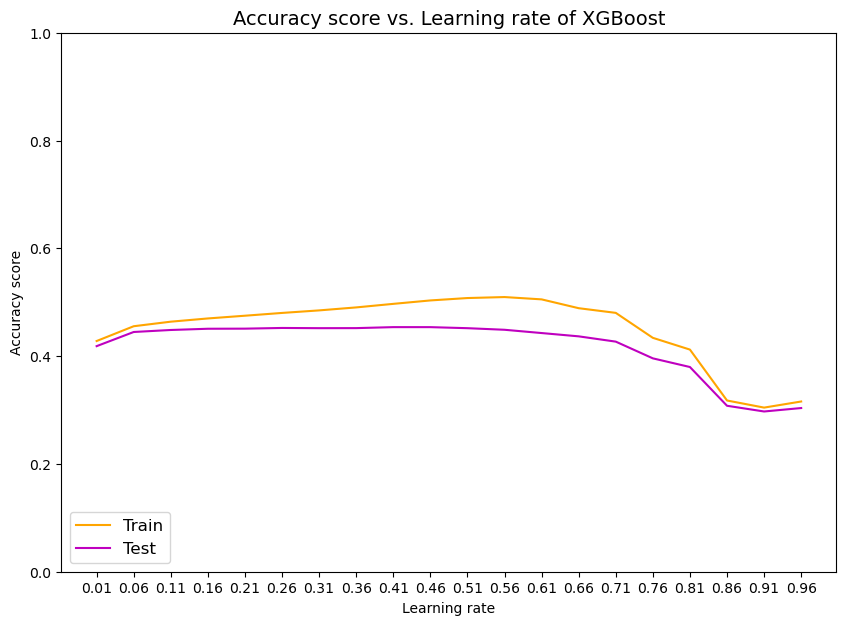

In [38]:
fig = plt.figure(figsize=(10, 7))
plt.plot(learning_rate_range, train_XG, c='orange', label='Train')
plt.plot(learning_rate_range, test_XG, c='m', label='Test')
plt.xlabel('Learning rate')
plt.xticks(learning_rate_range)
plt.ylabel('Accuracy score')
plt.ylim(0, 1)
plt.legend(prop={'size': 12}, loc=3)
plt.title('Accuracy score vs. Learning rate of XGBoost', size=14)
plt.show()

In [39]:
from sklearn.svm import SVC

In [ ]:
model = SVC(kernel='linear', C=1.0, random_state=42, decision_function_shape='ovr') 
# Train the model 
model.fit(X_train, y_train)
# Make predictions on the test set 
y_pred = model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred) 
print(f'Accuracy: {accuracy:.2f}')